In [21]:
# param
BASE_FOLDER = '/home/jim/Documents'
DATA_FOLDER = BASE_FOLDER + '/data'
CLEAN_DATA_FOLDER = BASE_FOLDER + '/clean_data'
steerings_range = list(range(-50, 55, 5))
speed_range = list(range(-100, 105, 5))
ratio = 0.9

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dist(df, column, value_range, title='', subplot=None):
    value_count = [len(df.loc[df[column] == v]) for v in value_range]
    
    if subplot:
        plt.subplot(*subplot)

    plt.bar(value_range, value_count, width=4)
    plt.xlabel(column)
    plt.ylabel('count')
    plt.title(title)

    if not subplot:
        plt.show()

In [12]:
import pandas as pd
import json

# trans json data to dataframe
with open(DATA_FOLDER + '/motor_im_map.json', 'r') as f:
  json_data = json.loads(f.read())

raw_data = {
    'im_key': [],
    'speed': [],
    'steering': [],
}

for im_key, (speed, steering) in json_data.items():
  raw_data['im_key'].append(im_key)
  raw_data['speed'].append(speed)
  raw_data['steering'].append(steering)

df = pd.DataFrame(raw_data)
print(df)

                                    im_key  speed  steering
0     c17c7f70-d749-11eb-8e4b-984827de9286      0         0
1     c1be0080-d749-11eb-8e4b-984827de9286      0         0
2     c1c2c318-d749-11eb-8e4b-984827de9286      0         0
3     c1c748a2-d749-11eb-8e4b-984827de9286      0         0
4     c1cbfa3c-d749-11eb-8e4b-984827de9286      0         0
5     c1d075c6-d749-11eb-8e4b-984827de9286      0         0
6     c1d4d5e4-d749-11eb-8e4b-984827de9286      0         0
7     c1d98148-d749-11eb-8e4b-984827de9286      0         0
8     c1de137a-d749-11eb-8e4b-984827de9286      0         0
9     c1e2b574-d749-11eb-8e4b-984827de9286      0         0
10    c1e6e9e6-d749-11eb-8e4b-984827de9286      0         0
11    c1ebb57a-d749-11eb-8e4b-984827de9286      0         0
12    c1f00d5a-d749-11eb-8e4b-984827de9286      0         0
13    c200154c-d749-11eb-8e4b-984827de9286      0         0
14    c20cd426-d749-11eb-8e4b-984827de9286      0         0
15    c212e4b0-d749-11eb-8e4b-984827de92

In [25]:
def seperate_data(df, max_dataset=None):
    train_df = pd.DataFrame(columns=df.columns)
    test_df = pd.DataFrame(columns=df.columns)

    for steering in steerings_range:
        _df = df.loc[df['steering'] == steering]

        if max_dataset and len(_df) > max_dataset:
            _df = _df.sample(n=max_dataset)

        train_temp = _df.sample(frac=ratio)
        test_temp = _df.drop(train_temp.index)

        train_df = train_df.append(train_temp)
        test_df = test_df.append(test_temp)

    return train_df, test_df


# remove speed == 0
df_2 = df.loc[df['speed'] != 0]
# seperate
train_df, test_df = seperate_data(df_2, max_dataset=500)

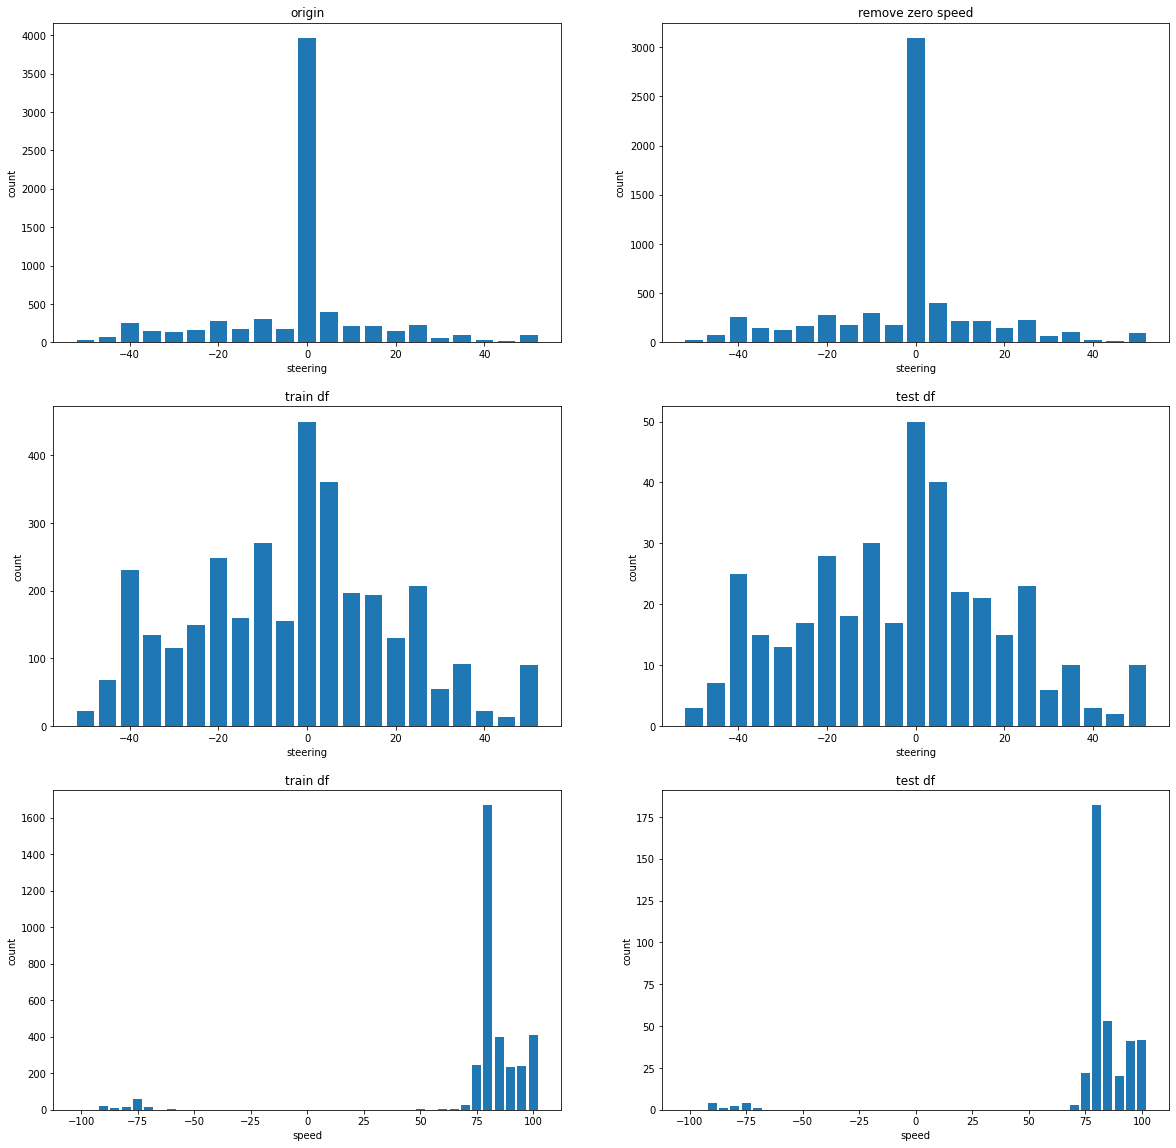

In [26]:
# origin df
plt.rcParams['figure.figsize'] = [20, 20]
plot_dist(df, 'steering', steerings_range, 'origin', (3, 2, 1))
plot_dist(df_2, 'steering', steerings_range, 'remove zero speed', (3, 2, 2))
plot_dist(train_df, 'steering', steerings_range, 'train df', (3, 2, 3))
plot_dist(test_df, 'steering', steerings_range, 'test df', (3, 2, 4))
plot_dist(train_df, 'speed', speed_range, 'train df', (3, 2, 5))
plot_dist(test_df, 'speed', speed_range, 'test df', (3, 2, 6))

In [27]:
# shuffle
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

import os

if not os.path.exists(CLEAN_DATA_FOLDER):
    os.mkdir(CLEAN_DATA_FOLDER)
    os.mkdir(CLEAN_DATA_FOLDER + '/img')

train_df.to_csv(CLEAN_DATA_FOLDER + '/train.csv', index=False)
test_df.to_csv(CLEAN_DATA_FOLDER + '/test.csv', index=False)

In [28]:
from shutil import copyfile

# cp img data
for k in train_df.append(test_df)['im_key']:
    img_path = f'/img/{k}.jpg'
    copyfile(DATA_FOLDER + img_path, CLEAN_DATA_FOLDER + img_path)

In [30]:
tar cvf clean_data.tar clean_data

tar: clean_data: Cannot stat: No such file or directory
tar: Exiting with failure status due to previous errors
